In [1]:
import os
import random
import time
import json
import warnings 
warnings.filterwarnings('ignore')

import cv2
import numpy as np
import pandas as pd

from pycocotools.coco import COCO
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from matplotlib.patches import Patch
import webcolors

plt.rcParams['axes.grid'] = False

In [2]:
dataset_path = '/opt/ml/segmentation/input/data'
kfold_0 = dataset_path + '/' + 'kfold_0_val.json'
kfold_1 = dataset_path + '/' + 'kfold_1_val.json'
kfold_2 = dataset_path + '/' + 'kfold_2_val.json'
kfold_3 = dataset_path + '/' + 'kfold_3_val.json'
kfold_4 = dataset_path + '/' + 'kfold_4_val.json'

with open(kfold_0, "r") as f:
    dataset0 = json.loads(f.read())
    
with open(kfold_1, "r") as f:
    dataset1 = json.loads(f.read())

with open(kfold_2, "r") as f:
    dataset2 = json.loads(f.read())

with open(kfold_3, "r") as f:
    dataset3 = json.loads(f.read())

with open(kfold_4, "r") as f:
    dataset4 = json.loads(f.read())

In [7]:
dataset = [dataset0, dataset1, dataset2, dataset3, dataset4]
kfold_anns = []
kfold_imgs = []

sum_nr_anns = 0
sum_nr_imgs = 0

for i, d in enumerate(dataset):
    categories = d['categories']
    anns = d['annotations']
    imgs = d['images']
    
    kfold_anns.append(anns)
    kfold_imgs.append(imgs)
    
    nr_cats = len(categories)
    nr_anns = len(anns)
    nr_imgs = len(imgs)
    
    sum_nr_anns += nr_anns
    sum_nr_imgs += nr_imgs
    
    print(f'number of kfold{i} categories:{nr_cats}')
    print(f'number of kfold{i} annotations:{nr_anns}')
    print(f'number of kfold{i} images:{nr_imgs}')
print()
print(f'number of total categories:{sum_nr_cats}')
print(f'number of total annotations:{sum_nr_anns}')
print(f'number of total images:{sum_nr_imgs}')

number of kfold0 categories:10
number of kfold0 annotations:5286
number of kfold0 images:655
number of kfold1 categories:10
number of kfold1 annotations:5205
number of kfold1 images:655
number of kfold2 categories:10
number of kfold2 annotations:5485
number of kfold2 images:654
number of kfold3 categories:10
number of kfold3 annotations:4842
number of kfold3 images:654
number of kfold4 categories:10
number of kfold4 annotations:5422
number of kfold4 images:654

number of total categories:50
number of total annotations:26240
number of total images:3272


In [8]:
cat_names = []
for category in categories:
    cat_names.append(category['name'])
print(cat_names)

['General trash', 'Paper', 'Paper pack', 'Metal', 'Glass', 'Plastic', 'Styrofoam', 'Plastic bag', 'Battery', 'Clothing']


In [19]:
cat_histograms = [np.zeros(nr_cats, dtype=int) for _ in range(5)]
for i, anns in enumerate(kfold_anns):
    for ann in anns:
        cat_histograms[i][ann['category_id']-1]+=1

dfs = []
for i in range(5):
    df = pd.DataFrame({'Categories': cat_names, 'Number of annotations': cat_histograms[i]})
    df = df.sort_values('Number of annotations', 0, False)
    dfs.append(df)
    display(df)

,Categories,Number of annotations
1,Paper,1843
7,Plastic bag,1564
5,Plastic,639
0,General trash,602
6,Styrofoam,246
2,Paper pack,138
4,Glass,110
3,Metal,85
9,Clothing,36
8,Battery,23


,Categories,Number of annotations
1,Paper,1917
7,Plastic bag,1475
5,Plastic,569
0,General trash,560
6,Styrofoam,279
2,Paper pack,144
4,Glass,128
3,Metal,84
9,Clothing,39
8,Battery,10


,Categories,Number of annotations
1,Paper,1965
7,Plastic bag,1644
5,Plastic,639
0,General trash,556
6,Styrofoam,263
4,Glass,132
2,Paper pack,131
3,Metal,109
9,Clothing,38
8,Battery,8


,Categories,Number of annotations
1,Paper,1725
7,Plastic bag,1299
5,Plastic,541
0,General trash,535
6,Styrofoam,266
3,Metal,158
4,Glass,140
2,Paper pack,134
9,Clothing,35
8,Battery,9


,Categories,Number of annotations
1,Paper,1861
7,Plastic bag,1661
5,Plastic,702
0,General trash,529
6,Styrofoam,289
3,Metal,126
2,Paper pack,112
4,Glass,100
9,Clothing,29
8,Battery,13


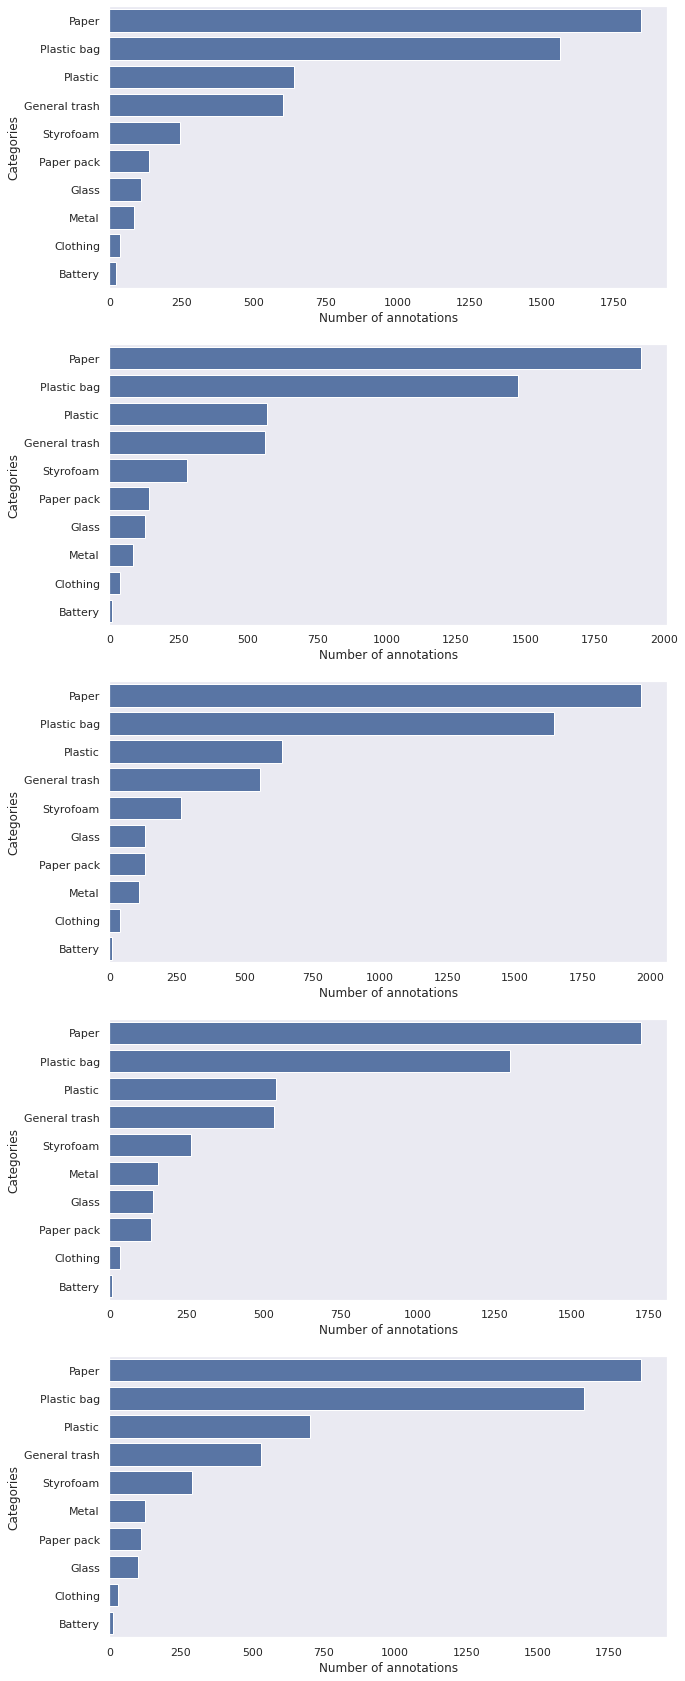

In [27]:
f, axes = plt.subplots(5,1, figsize = (10,30))

for i in range(5):
    sns.barplot(x="Number of annotations", y="Categories", ax=axes[i], data=dfs[i], label="Total", color="b")

In [28]:
coco = COCO(kfold_0)

loading annotations into memory...
Done (t=0.60s)
creating index...
index created!


In [39]:
img_id = coco.getImgIds(2048)
img = coco.loadImgs(img_id)
img

[{'license': 0,
  'url': None,
  'file_name': 'batch_02_vt/1414.jpg',
  'height': 512,
  'width': 512,
  'date_captured': None,
  'id': 2048}]

In [40]:
ann_id = coco.getAnnIds(imgIds=img_id)
load_anns = coco.loadAnns(ann_id)
print(ann_id)

[18312, 18313, 18314, 18315, 18316, 18317, 18318, 18319, 18320, 18321, 18322, 18323, 18324, 18325, 18326, 18327, 18328, 18329, 18330, 18331]
